In [376]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [518]:
# Sets the number of examples.
M = 100

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

# Create target function and its noisy version.
x = np.linspace(-3, 3, M).reshape(M, 1)
y = 2 + x + 0.5*x**2;
y_noisy = y + np.random.randn(M, 1)

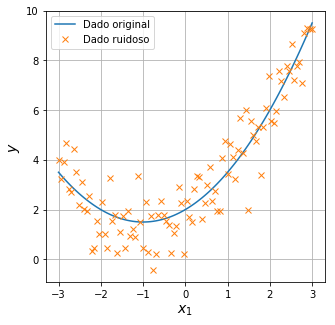

In [519]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [520]:
# Polynomial order.
model_order = 20

# Concatenate both column vectors.
X = np.ones((M, 1))
for i in range(1, model_order+1):
    X = np.c_[X, np.power(x, i)]
    
scaler = StandardScaler()
X = np.c_[np.ones((M, 1)), scaler.fit_transform(X[:,1:])]

I = np.eye(model_order+1)
I[0,0] = 0

# Closed-form solution.
lambdaf = 0.0
a_opt = np.linalg.inv(np.transpose(X).dot(X) + I.dot(lambdaf)).dot(np.transpose(X).dot(y_noisy))

# Calculate mean squared error of optimum solution.
yhat = X.dot(a_opt)
Joptimum = (1/M)*np.sum(np.power((y_noisy - yhat), 2) )

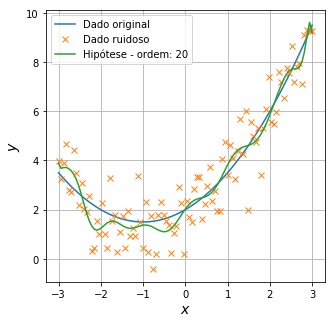

In [521]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso') 
plt.plot(x, yhat, label='Hipótese - ordem: '+str(model_order))
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [545]:
# Sets the number of examples.
M = 100

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

# Create target function and its noisy version.
x = np.linspace(-3, 3, M).reshape(M, 1)
y = 2 + x + 0.5*x**2;
y_noisy = y + np.random.randn(M, 1)

In [546]:
# Polynomial order.
model_order = 20

# Concatenate both column vectors.
X = np.ones((M, 1))
for i in range(1, model_order+1):
    X = np.c_[X, np.power(x, i)]

In [560]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.0000001
# Regularization term.
lambdaf = 0.0
# Maximum number of iterations.
n_iterations = 5000

# Random initialization of parameters.
a = np.zeros((model_order+1,1))
for i in range(0,model_order+1): a[i] = 1
    
grad_hist = np.zeros((model_order+1, n_iterations))

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(y_noisy - X.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
while iteration < n_iterations and error > 0.001:
    a_aux = np.zeros((model_order+1, 1))
    for i in range(1, model_order+1): a_aux[i] = a[i]
    reg_term = a_aux*(2*lambdaf)
    gradients = -2/M*X.T.dot(y_noisy - X.dot(a)) + reg_term
    a = a - alpha * gradients
    Jgd[iteration+1] = (1/M)*sum(np.power((y_noisy - X.dot(a)), 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    for i in range(0,model_order+1): grad_hist[i, iteration] = gradients[i]
    iteration = iteration + 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


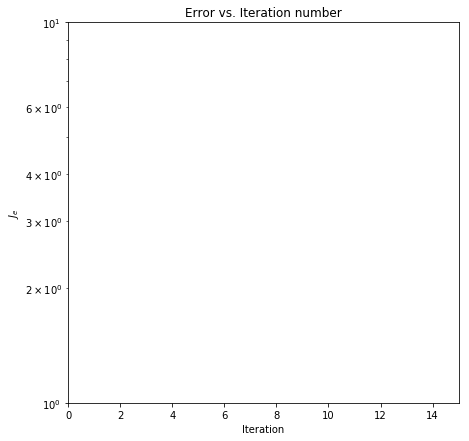

In [561]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

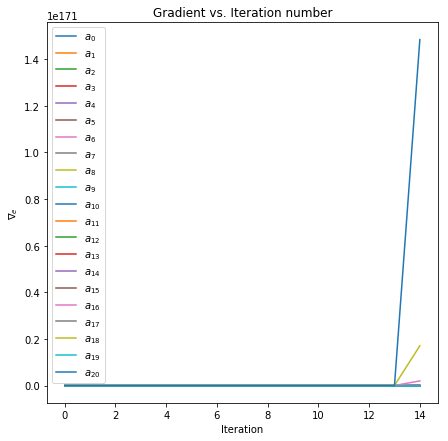

In [562]:
fig = plt.figure(figsize=(7,7))

for i in range(0, model_order+1):
    strr = '$a_{'+str(i)+'}$'
    plt.plot(np.arange(0, iteration), grad_hist[i,0:iteration], label=strr)
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()

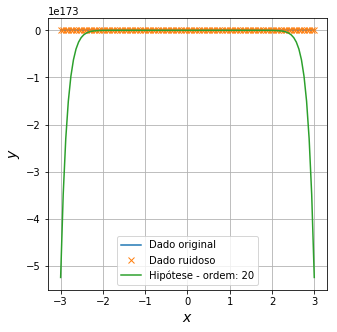

In [563]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso') 
plt.plot(x, X.dot(a), label='Hipótese - ordem: '+str(model_order))
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [564]:
print('Erro ótimo: ', Joptimum)

for i in range(0, model_order+1):
    print('a%d:\t%1.4e' % (i,a_opt[i, 0]))

Erro ótimo:  0.6934540831340099
a0:	3.4265e+00
a1:	4.1298e+00
a2:	-6.8688e+00
a3:	-5.9333e+01
a4:	2.0420e+02
a5:	7.3881e+02
a6:	-1.9589e+03
a7:	-4.6749e+03
a8:	1.0072e+04
a9:	1.6726e+04
a10:	-3.1218e+04
a11:	-3.6085e+04
a12:	6.0906e+04
a13:	4.8108e+04
a14:	-7.5087e+04
a15:	-3.8938e+04
a16:	5.6635e+04
a17:	1.7600e+04
a18:	-2.3816e+04
a19:	-3.4168e+03
a20:	4.2716e+03


In [565]:
yhat = X.dot(a)
J = (1/M)*np.sum(np.power((y_noisy - yhat), 2) )
print('Erro: ', J)

for i in range(0, model_order+1):
    print('a%d:\t%1.4e' % (i,a[i, 0]))

Erro:  inf
a0:	-6.9415e+154
a1:	-4.8222e+141
a2:	-5.8109e+155
a3:	-4.0408e+142
a4:	-4.9009e+156
a5:	-3.4260e+143
a6:	-4.1596e+157
a7:	-2.8976e+144
a8:	-3.5495e+158
a9:	-2.4491e+145
a10:	-3.0429e+159
a11:	-2.0952e+146
a12:	-2.6193e+160
a13:	-1.8115e+147
a14:	-2.2626e+161
a15:	-1.5717e+148
a16:	-1.9607e+162
a17:	-1.3590e+149
a18:	-1.7038e+163
a19:	-1.1734e+150
a20:	-1.4843e+164


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
